In [1]:
"""고조선
북부여
가야
신라
고구려
백제
발해
후고구려
후백제
고려
조선
일제강점기"""

'고조선\n북부여\n가야\n신라\n고구려\n백제\n발해\n후고구려\n후백제\n고려\n조선\n일제강점기'

In [2]:
start = [-2333,
-239,
42,
-57,
-37,
-18,
698,
890,
892,
918,
1392,
1910]

In [3]:
end = [-238,
-58,
532,
935,
668,
660,
926,
918,
935,
1392,
1910,
1945]

In [4]:
span_real = []
for i in range(len(end)):
    span_real.append(end[i]-start[i])

In [5]:
span_real

[2095, 181, 490, 992, 705, 678, 228, 28, 43, 474, 518, 35]

# 모래더미

In [45]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2016 Allen Downey
MIT License: http://opensource.org/licenses/MIT
"""
from __future__ import print_function, division

import sys

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from scipy.signal import convolve2d

"""
For animation to work in the notebook, you might have to install
ffmpeg.  On Ubuntu and Linux Mint, the following should work.

    sudo add-apt-repository ppa:mc3man/trusty-media
    sudo apt-get update
    sudo apt-get install ffmpeg
"""

class Cell2D:
    """Implements Conway's Game of Life."""

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def step(self):
        """Executes one time step."""
        pass


class Cell2DViewer:
    """Generates an animated view of an array image."""

    cmap = plt.get_cmap('Greens')
    options = dict(interpolation='nearest', alpha=0.8,
                   vmin=0, vmax=1, origin='upper')

    def __init__(self, viewee):
        self.viewee = viewee
        self.im = None
        self.hlines = None
        self.vlines = None

    # TODO: should this really take iters?
    def step(self, iters=1):
        """Advances the viewee the given number of steps."""
        for i in range(iters):
            self.viewee.step()

    def draw(self, grid=False):
        """Draws the array and any other elements.

        grid: boolean, whether to draw grid lines
        """
        self.draw_array(self.viewee.array)
        if grid:
            self.draw_grid()

    def draw_array(self, array=None, cmap=None, **kwds):
        """Draws the cells."""
        # Note: we have to make a copy because some implementations
        # of step perform updates in place.
        if array is None:
            array = self.viewee.array
        a = array.copy()
        cmap = self.cmap if cmap is None else cmap

        n, m = a.shape
        plt.axis([0, m, 0, n])
        plt.xticks([])
        plt.yticks([])

        options = self.options.copy()
        options['extent'] = [0, m, 0, n]
        options.update(kwds)
        self.im = plt.imshow(a, cmap, **options)

    def draw_grid(self):
        """Draws the grid."""
        a = self.viewee.array
        n, m = a.shape
        lw = 2 if m < 7 else 1
        options = dict(color='white', linewidth=lw)

        # the shift is a hack to get the grid to line up with the cells
        shift = 0.005 * n
        rows = np.arange(n) + shift
        self.hlines = plt.hlines(rows, 0, m, **options)

        cols = np.arange(m)
        self.vlines = plt.vlines(cols, 0, n, **options)

    def animate(self, frames=20, interval=200, grid=False):
        """Creates an animation.

        frames: number of frames to draw
        interval: time between frames in ms
        """
        fig = plt.gcf()
        self.draw(grid)
        anim = animation.FuncAnimation(fig, self.animate_func,
                                       init_func=self.init_func,
                                       frames=frames, interval=interval)
        return anim

    def init_func(self):
        """Called at the beginning of an animation."""
        pass

    def animate_func(self, i):
        """Draws one frame of the animation."""
        if i > 0:
            self.step()
        a = self.viewee.array
        self.im.set_array(a)
        return (self.im,)

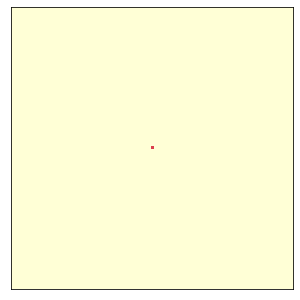

C:\Users\sjkan\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [399]:
import itertools

import numpy as np
import matplotlib.pyplot as plt

#from Cell2D import Cell2D, Cell2DViewer
from scipy.signal import correlate2d


class SandPile(Cell2D):
    """Diffusion Cellular Automaton."""

    kernel = np.array([[0, 1, 0],
                       [1,-4, 1],
                       [0, 1, 0]], dtype=np.int32)
#     kernel = np.array([[0, 3, 0],
#                        [3,-12, 3],
#                        [0, 3, 0]], dtype=np.int32)

    def __init__(self, n, m=None, level=9):
        """Initializes the attributes.
        n: number of rows
        m: number of columns
        level: starting value for all cells
        """
        m = n if m is None else m
        self.array = np.ones((n, m), dtype=np.int32) * level
        self.reset()

    def reset(self):
        """Start keeping track of the number of toppled cells.
        """
        self.toppled_seq = []

    def step(self, K=5):
        """Executes one time step.
        
        returns: number of cells that toppled
        """
        toppling = self.array > K
        num_toppled = np.sum(toppling)
        self.toppled_seq.append(num_toppled)

        c = correlate2d(toppling, self.kernel, mode='same')
        self.array += c
        return num_toppled
    
    def drop(self):
        """Increments a random cell."""
        a = self.array
        n, m = a.shape
        index = np.random.randint(n), np.random.randint(m)
        a[index] += 1
    
    def run(self):
        """Runs until equilibrium.
        
        returns: duration, total number of topplings
        """
        total = 0
        for i in itertools.count(1):
            num_toppled = self.step()
            total += num_toppled
            if num_toppled == 0:
                return i, total

    def drop_and_run(self):
        """Drops a random grain and runs to equilibrium.
        
        returns: duration, total_toppled
        """
        self.drop()
        duration, total_toppled = self.run()
        return duration, total_toppled


class SandPileViewer(Cell2DViewer):
    cmap = plt.get_cmap('YlOrRd')
    options = dict(interpolation='nearest', alpha=0.8,
                   vmin=0, vmax=5)
    
    def __init__(self, viewee, drop_flag=True):
        """Initializes the attributes.
        drop_flag: determines whether `step` drops a grain
        """
        Cell2DViewer.__init__(self, viewee)
        self.drop_flag = drop_flag

    def step(self):
        """Advances the viewee one step."""
        if self.drop_flag:
            self.viewee.drop_and_run()
        else:
            self.viewee.step()


def single_source(pile, height=1024):
    """Adds a tower to the center cell.
    
    height: value assigned to the center cell
    """
    a = pile.array
    n, m = a.shape
    a[:, :] = 0
    a[n//2, m//2] = height


def main():
    n = 101
    pile = SandPile(n)
    single_source(pile, height=2**2)
    viewer = SandPileViewer(pile, drop_flag=False)
    anim = viewer.animate(interval=0)
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
    plt.show()


if __name__ == '__main__':
    main()

In [400]:
from empiricaldist import Pmf
from tqdm import tqdm

In [401]:
num_empire = []
empire_span = []
empire_span_all = []

for j in tqdm(range(1000)):
    
    pile2 = SandPile(n=10, level=4) 
    pile2.run()

    iters = 4278
    res = [pile2.drop_and_run() for _ in range(iters)]

    T, S = np.transpose(res)

    #T = T[T>1]
    #S = S[S>0]

    #12개 제국
    criteria = 79
    avalanch_idx = []
    for i in range(len(S)):
        if S[i] >= criteria:
            avalanch_idx.append(i)

    num_empire.append(len(avalanch_idx))
    
    empire_span_tmp = []
    
    if len(avalanch_idx)==12:
        empire_span_tmp.append(avalanch_idx[0])
        empire_span_all.append(avalanch_idx[0])
        for i in range(len(avalanch_idx)-1):
            empire_span_tmp.append(avalanch_idx[i+1]-avalanch_idx[i])
            empire_span_all.append(avalanch_idx[i+1]-avalanch_idx[i])
    empire_span.append(empire_span_tmp)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:05<00:00,  3.27it/s]


중국은 K=5, criteria = 56

# K=5(중국과 동일), criteria = 79

array([0.00315, 0.0042 , 0.01365, 0.02625, 0.0441 , 0.0651 , 0.0903 ,
       0.1239 , 0.13755, 0.13545, 0.0945 , 0.09975, 0.084  , 0.05355,
       0.0357 , 0.01785, 0.0105 , 0.0042 , 0.0021 , 0.00315, 0.00105])

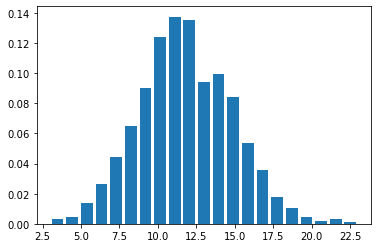

In [404]:
array = plt.hist(num_empire,bins=len(set(num_empire)),density=True, rwidth = 0.8)
y1,x1 = array[0], array[1]
y1

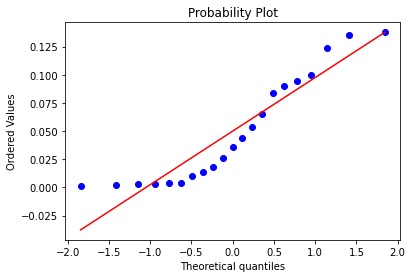

In [405]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = y1  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [406]:
np.mean(num_empire) #12 가 되도록 criteria도 조정 필요

11.774

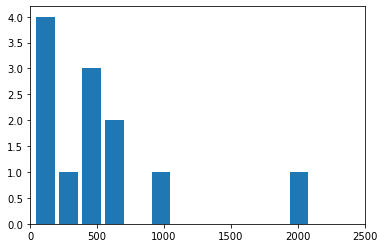

In [407]:
plt.hist(span_real, bins=12,density=False, rwidth = 0.8)
plt.xlim(0,2500)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\1925617654.py:5: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)


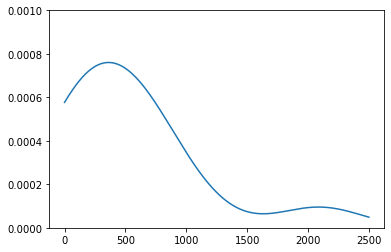

In [408]:
import matplotlib.pyplot as plt
import numpy
from scipy import stats
data = span_real
density = stats.kde.gaussian_kde(data)
x = numpy.arange(0, 2500)
plt.plot(x, density(x))
plt.ylim(0,0.001)
plt.show()

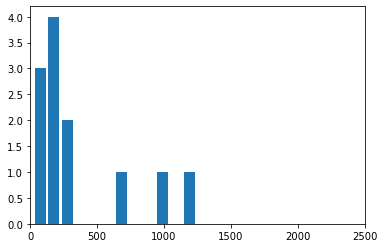

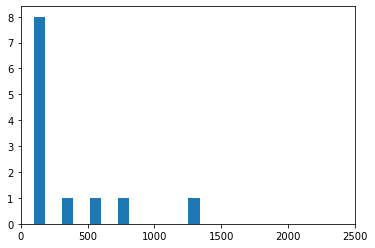

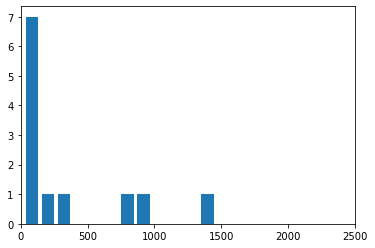

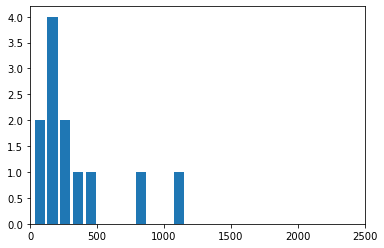

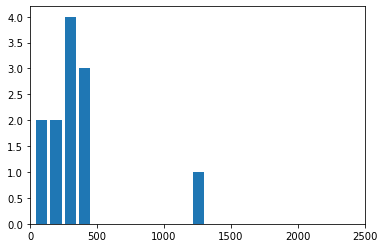

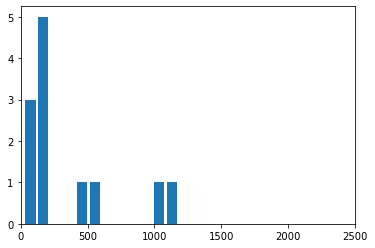

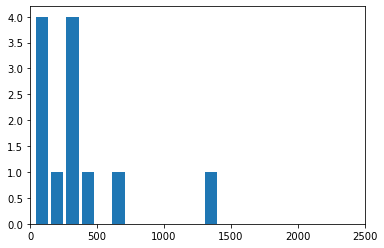

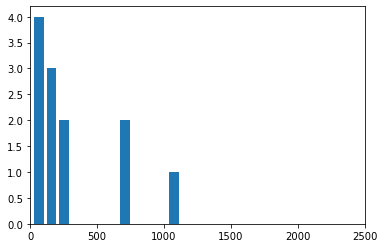

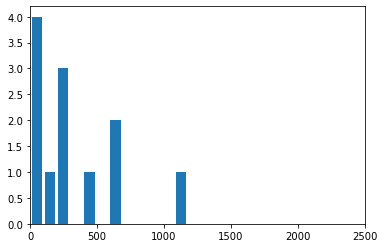

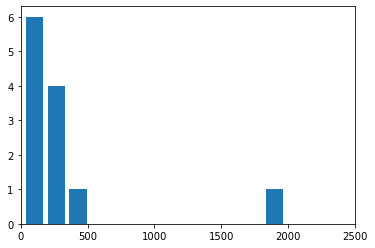

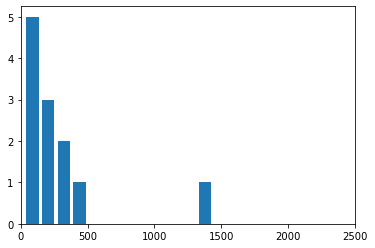

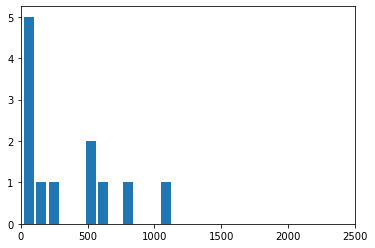

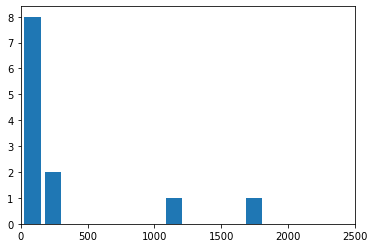

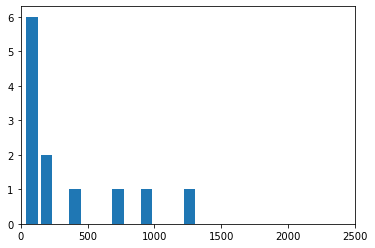

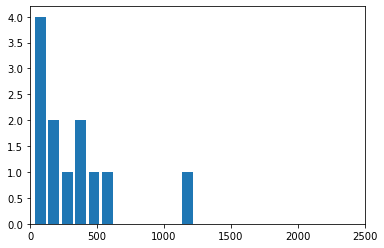

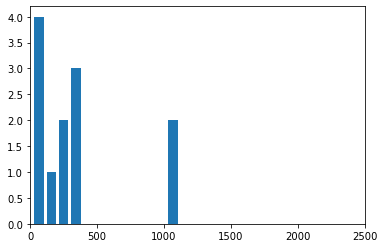

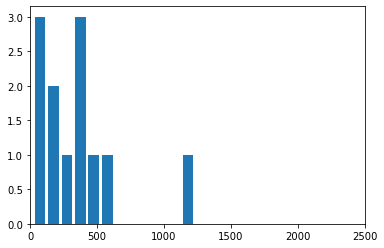

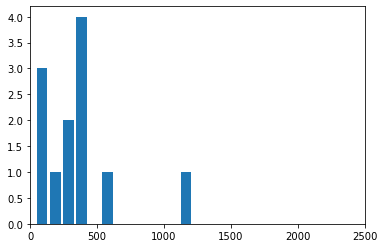

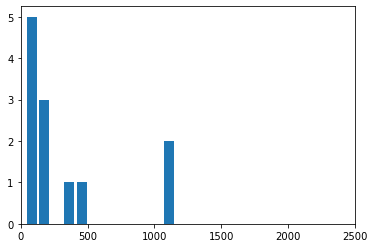

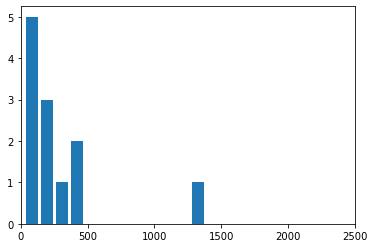

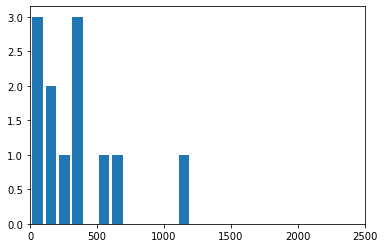

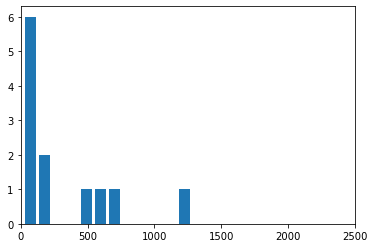

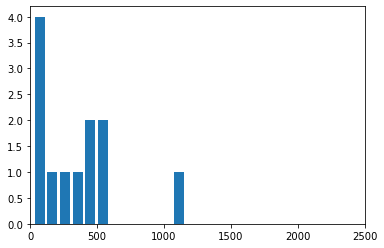

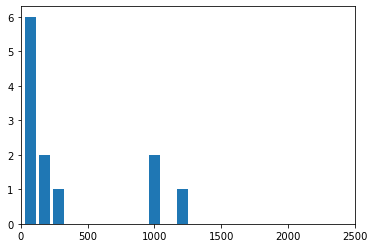

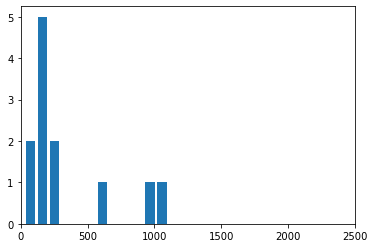

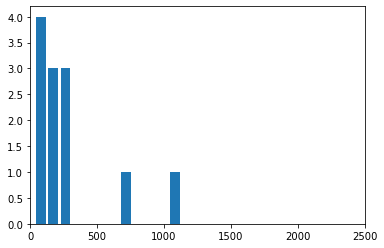

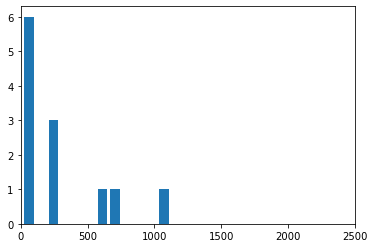

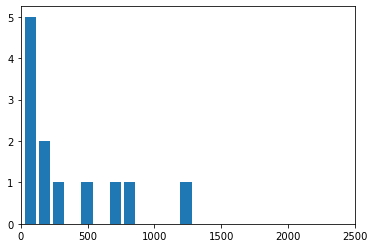

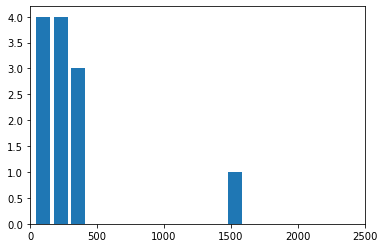

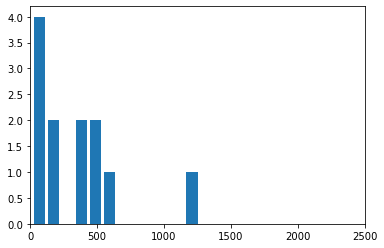

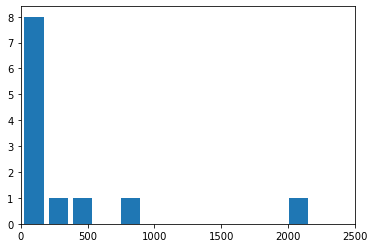

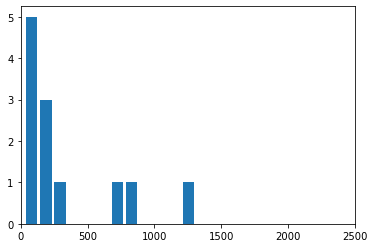

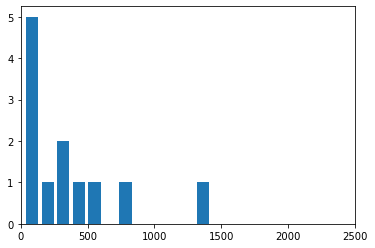

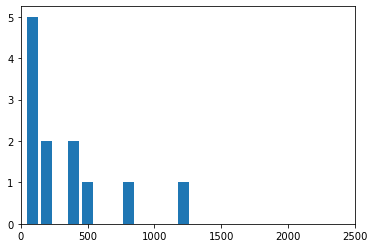

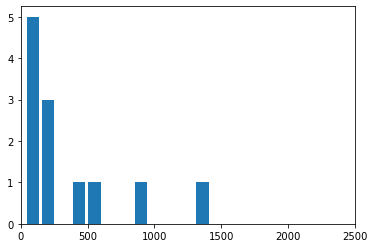

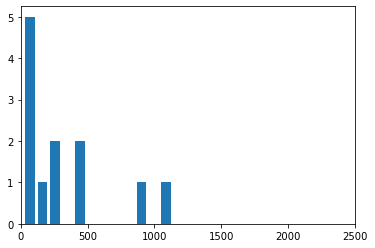

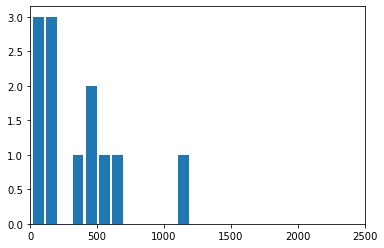

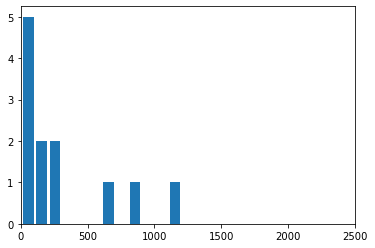

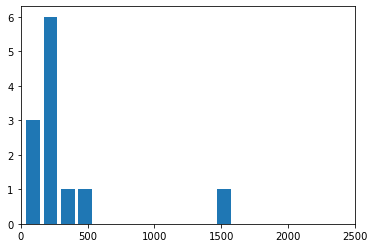

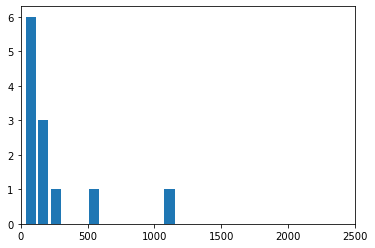

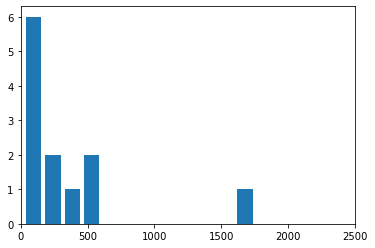

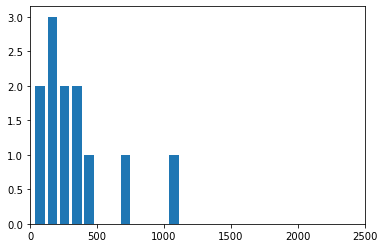

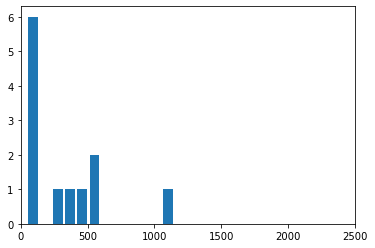

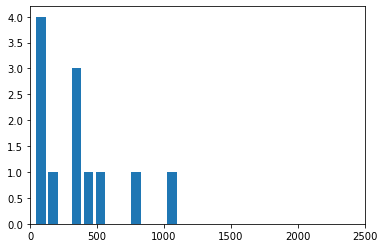

In [409]:
for i in range(1000):
    if len(empire_span[i])==12 and max(empire_span[i])>1100:
        plt.hist(empire_span[i], bins=12, density = False, rwidth = 0.8)
        plt.xlim(0,2500)
        plt.show()

In [410]:
cnt=0
for i in range(1000):
    if len(empire_span[i])==12:
        cnt+=1
cnt

129

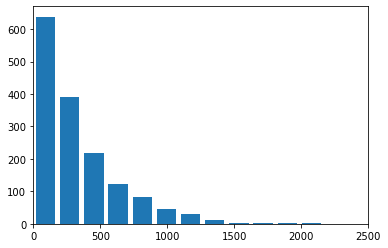

In [411]:
plt.hist(empire_span_all, bins=12, density = False, rwidth = 0.8)
plt.xlim(0,2500)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: Dep

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: Dep

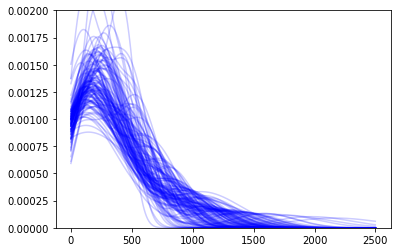

In [412]:
for i in range(1000):
    if len(empire_span[i])==12:
        data = empire_span[i]
        density = stats.kde.gaussian_kde(data)
        x = numpy.arange(0, 2500)
        colors = plt.cm.summer(np.linspace(0, 1, 1000))
        plt.plot(x, density(x), color='b', alpha=0.2)
plt.ylim(0,0.002)
plt.show()

In [413]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [414]:
span_real

[2095, 181, 490, 992, 705, 678, 228, 28, 43, 474, 518, 35]

In [415]:
span_real_sort = np.sort(span_real)

In [416]:
span_real_sort

array([  28,   35,   43,  181,  228,  474,  490,  518,  678,  705,  992,
       2095])

In [417]:
sim_list = []
sim_idx=[]
for i in range(len(empire_span)):
    if len(empire_span[i])==12:
        sim_idx.append(i)
        sim_list.append(cos_sim(span_real_sort, np.sort(empire_span[i])))

In [418]:
tmp = np.sort(sim_list)
tmp2 = tmp[-1:]
tmp2

array([0.99668174])

In [419]:
top1 = []
for i in range(len(tmp2)):
    top1.append(empire_span[sim_idx[sim_list.index(tmp2[i])]])    

In [420]:
top1_all = []
for i in range(len(top1)):
    for j in top1[i]:
        top1_all.append(j)

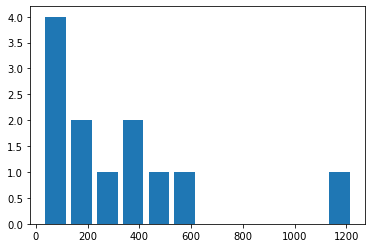

In [421]:
plt.hist(top1_all, bins=12, density=False, rwidth = 0.8)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\2597138480.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)


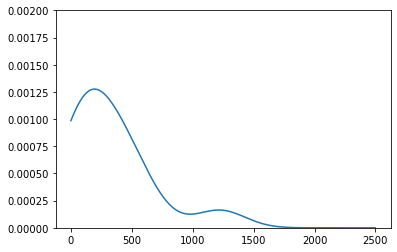

In [422]:
data = top1_all
density = stats.kde.gaussian_kde(data)
x = numpy.arange(0, 2500)
plt.plot(x, density(x))
plt.ylim(0,0.002)
plt.show()

# K=16, criteria = 56(중국과 동일)

array([0.004, 0.003, 0.01 , 0.024, 0.048, 0.073, 0.096, 0.125, 0.128,
       0.119, 0.113, 0.073, 0.073, 0.051, 0.028, 0.021, 0.005, 0.003,
       0.001, 0.   , 0.001, 0.001])

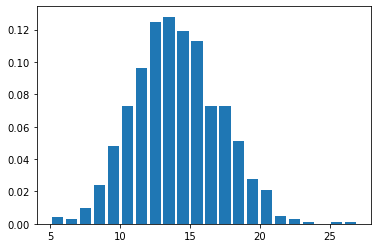

In [346]:
array = plt.hist(num_empire,bins=len(set(num_empire))+1,density=True, rwidth = 0.8)
y1,x1 = array[0], array[1]
y1

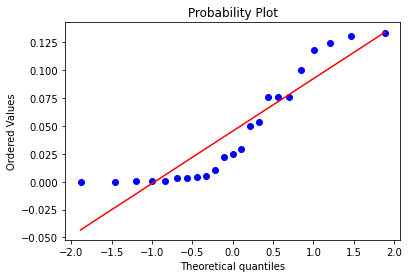

In [341]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = y1  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [342]:
np.mean(num_empire) #12 가 되도록 criteria도 조정 필요

13.568

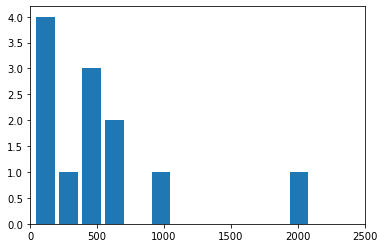

In [443]:
plt.hist(span_real, bins=12,density=False, rwidth = 0.8)
plt.xlim(0,2500)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\1925617654.py:5: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)


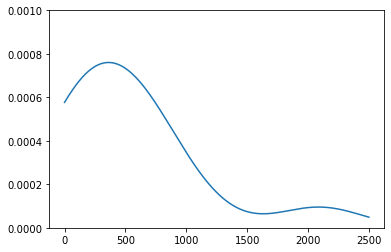

In [444]:
import matplotlib.pyplot as plt
import numpy
from scipy import stats
data = span_real
density = stats.kde.gaussian_kde(data)
x = numpy.arange(0, 2500)
plt.plot(x, density(x))
plt.ylim(0,0.001)
plt.show()

In [466]:
#대한민국이 2022년까지 존재할 확률 (1948~2022 : 74년)
1-sum(density(x)[:74])

0.9549047506239727

In [467]:
#대한민국이 2661년(1948 + 713년)까지 존재할 확률 50%
1-sum(density(x)[:713])

0.5000003978705756

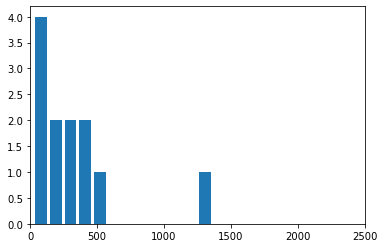

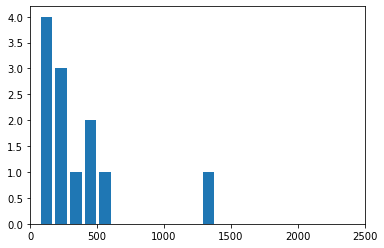

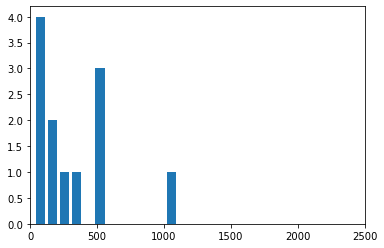

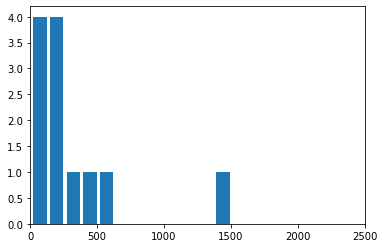

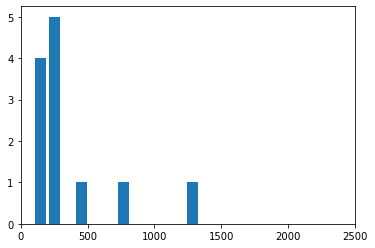

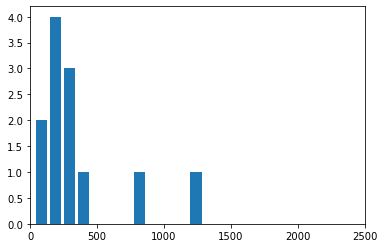

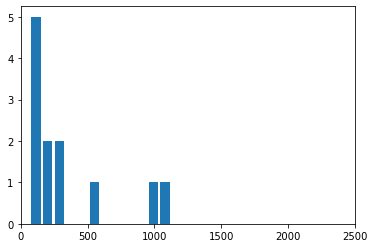

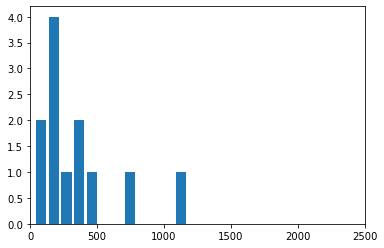

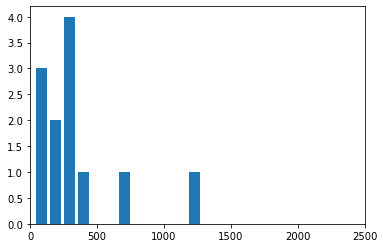

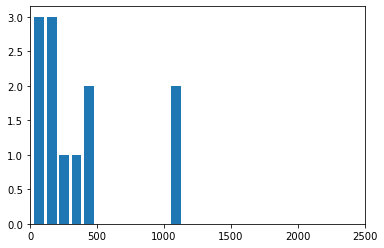

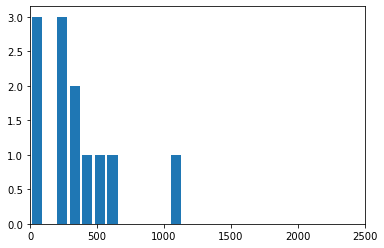

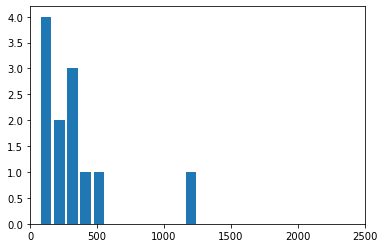

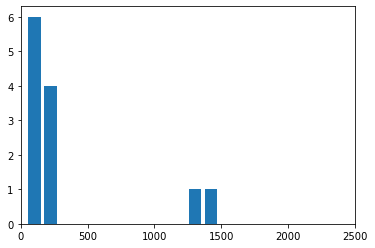

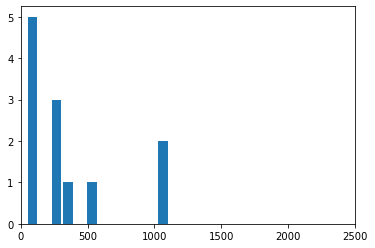

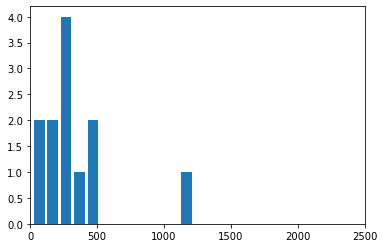

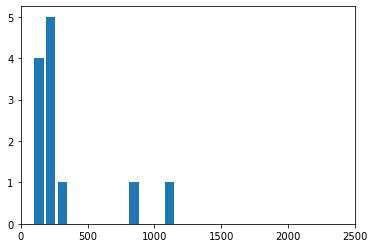

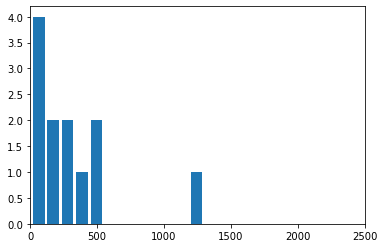

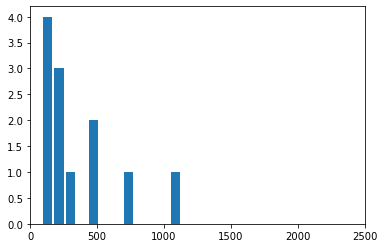

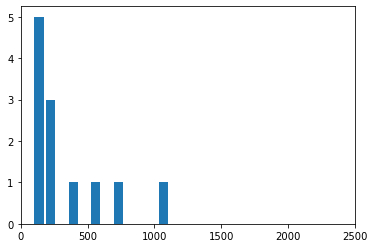

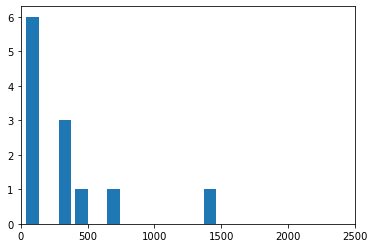

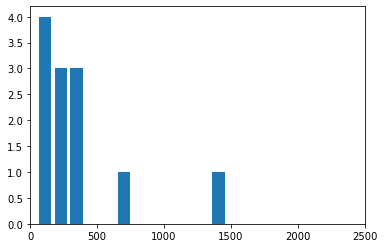

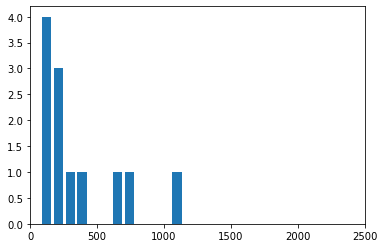

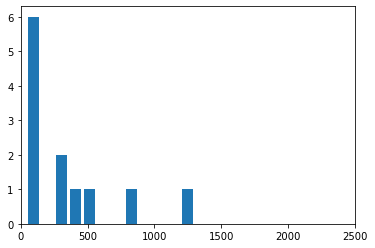

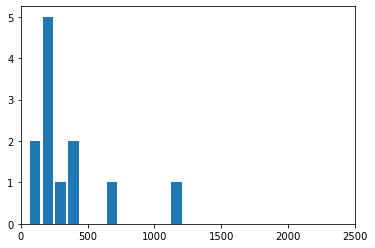

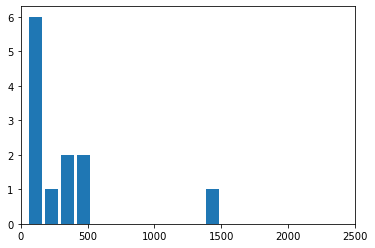

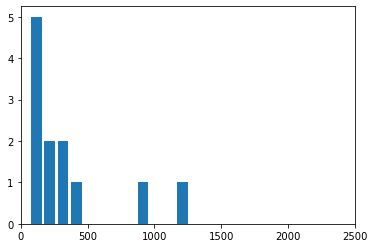

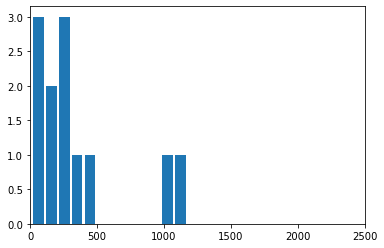

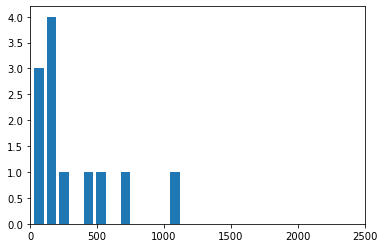

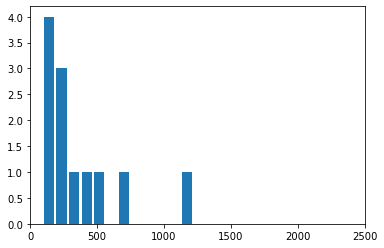

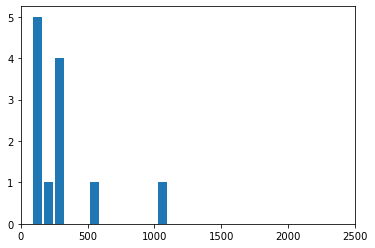

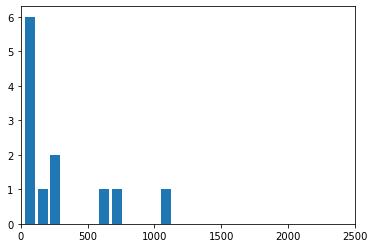

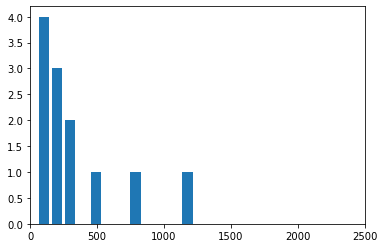

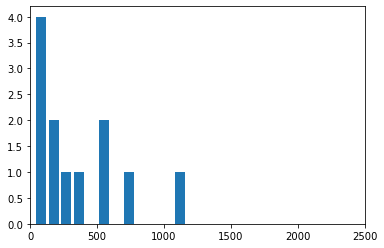

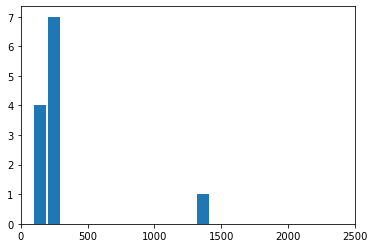

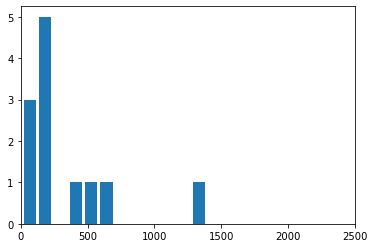

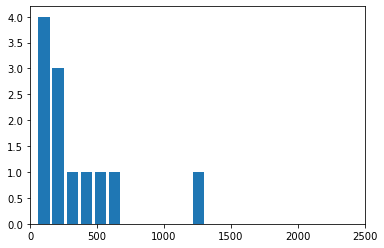

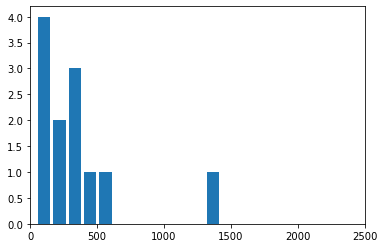

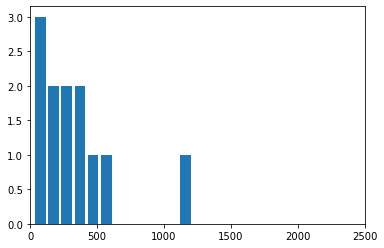

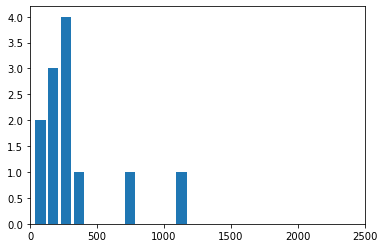

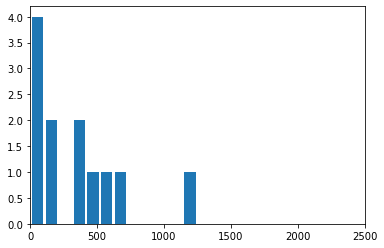

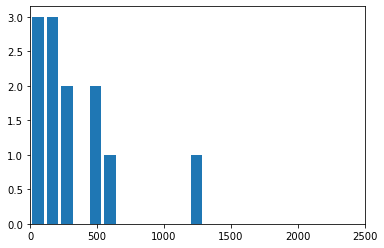

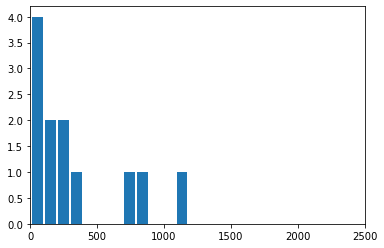

In [364]:
for i in range(1000):
    if len(empire_span[i])==12 and max(empire_span[i])>1100:
        plt.hist(empire_span[i], bins=12, density = False, rwidth = 0.8)
        plt.xlim(0,2500)
        plt.show()

In [326]:
cnt=0
for i in range(1000):
    if len(empire_span[i])==12:
        cnt+=1
cnt

125

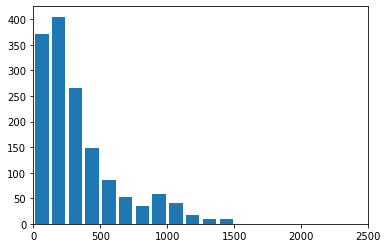

In [398]:
plt.hist(empire_span_all, bins=12, density = False, rwidth = 0.8)
plt.xlim(0,2500)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: Dep

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)
C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\691535512.py:4: Dep

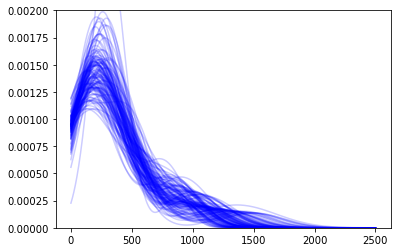

In [328]:
for i in range(1000):
    if len(empire_span[i])==12:
        data = empire_span[i]
        density = stats.kde.gaussian_kde(data)
        x = numpy.arange(0, 2500)
        colors = plt.cm.summer(np.linspace(0, 1, 1000))
        plt.plot(x, density(x), color='b', alpha=0.2)
plt.ylim(0,0.002)
plt.show()

In [329]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [330]:
span_real

[2095, 181, 490, 992, 705, 678, 228, 28, 43, 474, 518, 35]

In [331]:
span_real_sort = np.sort(span_real)

In [332]:
span_real_sort

array([  28,   35,   43,  181,  228,  474,  490,  518,  678,  705,  992,
       2095])

In [393]:
sim_list = []
sim_idx=[]
for i in range(len(empire_span)):
    if len(empire_span[i])==12:
        sim_idx.append(i)
        sim_list.append(cos_sim(span_real_sort, np.sort(empire_span[i])))

In [394]:
tmp = np.sort(sim_list)
tmp2 = tmp[-1:]
tmp2

array([0.99555572])

In [395]:
top1 = []
for i in range(len(tmp2)):
    top1.append(empire_span[sim_idx[sim_list.index(tmp2[i])]])    

In [396]:
top1_all = []
for i in range(len(top1)):
    for j in top1[i]:
        top1_all.append(j)

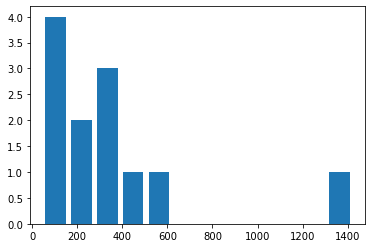

In [397]:
plt.hist(top1_all, bins=12, density=False, rwidth = 0.8)
plt.show()

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5052\2597138480.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(data)


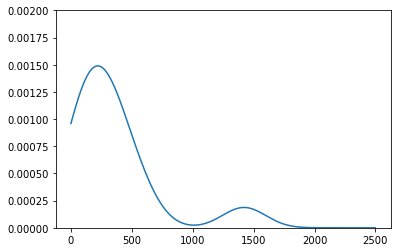

In [384]:
data = top1_all
density = stats.kde.gaussian_kde(data)
x = numpy.arange(0, 2500)
plt.plot(x, density(x))
plt.ylim(0,0.002)
plt.show()